In [1]:
import numpy as np
import tempfile
import os
import matplotlib.pyplot as plt
import scipy.io as sci
import scipy.fftpack as sff

**I - Data generation and manipulation**

The objective of this first short part is to create some datasets to get accustomed to them. It will enable us to :
- recall the notion of sparsity ;
- geometrically understand the effect of the mixing.

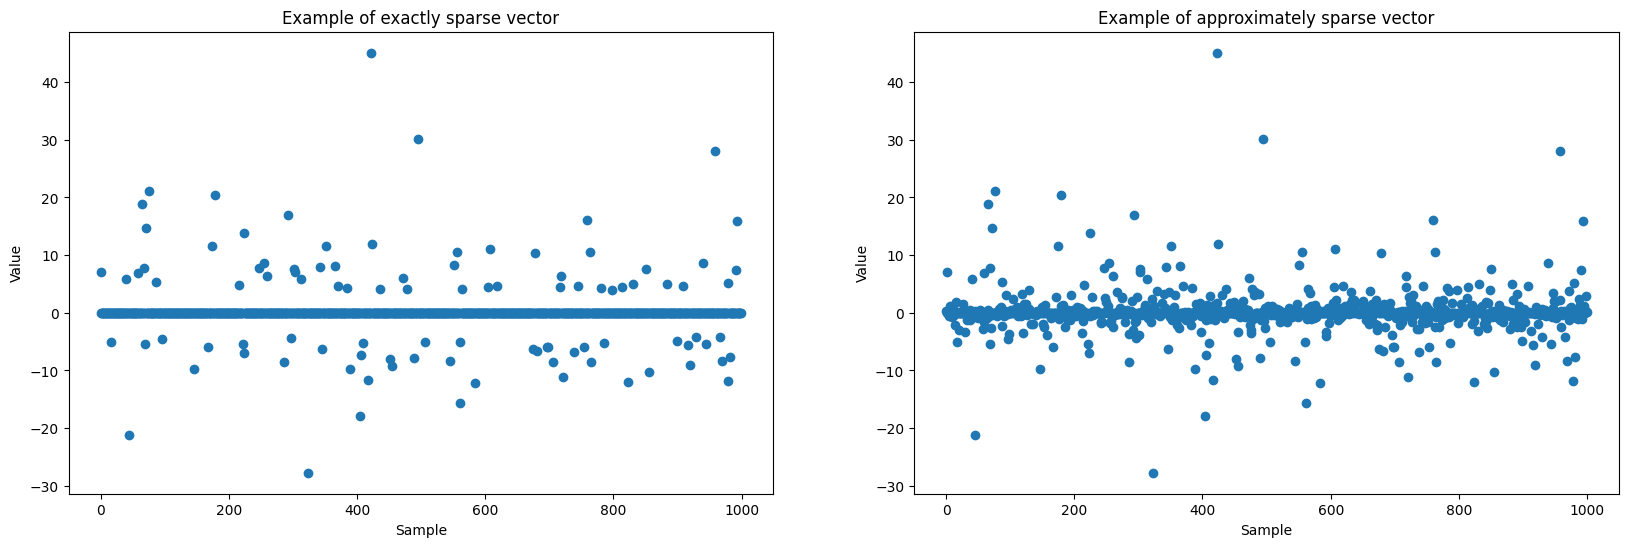

In [2]:
power = 3
approx_sparse = np.random.randn(1000)**power
exact_sparse = approx_sparse*(np.abs(approx_sparse)>4)

fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.plot(exact_sparse, 'o')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Example of exactly sparse vector');

fig.add_subplot(1,2,2)
plt.plot(approx_sparse, 'o')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Example of approximately sparse vector');

What is the difference between an exactly and an approximately sparse signal? Recall the two corresponding definitions.

### Exactly Sparse Signal
An **exactly sparse** signal has elements that are mostly zeros. This means that in a vector representing the signal, the majority of the entries are zero. The non-zero entries are typically few and are considered the significant components of the signal. The Python code snippet oneprovided defines an exactly sparse signal by applying a threshold to an "approximate sparse" vector, turning values below this threshold into exact zeros (`exact_sparse = approx_sparse*(np.abs(approx_sparse)>4)`). This step effectively zeros out any values in `approx_sparse` that are below an absolute value of 4.

### Approximately Sparse Signal
An **approximately sparse** signal is one where many of the values are close to zero but not exactly zero. Such signals are useful when oneneed to maintain a continuity of data but still want to emphasize the presence of few significant values. The Python code snippet defines `approx_sparse` by raising a normally distributed set of values to the power of three (`approx_sparse = np.random.randn(1000)**power`). This manipulation skews the distribution, pushing more values towards zero (but not exactly zero) and stretching out the extremes.

Now let's start to look at some mixtures and to try to geometrically interpret the impact of the mixing.

First, generate a simulated source S matrix. Plot the corresponding scatter plot. Interpret the shape of the scatter plot oneobtain.

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Daniel Torres\AppData\Local\Temp\ipykernel_13928\2251951174.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$\mathbf{S}_0$")
C:\Users\Daniel Torres\AppData\Local\Temp\ipykernel_13928\2251951174.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathbf{S}_1$")


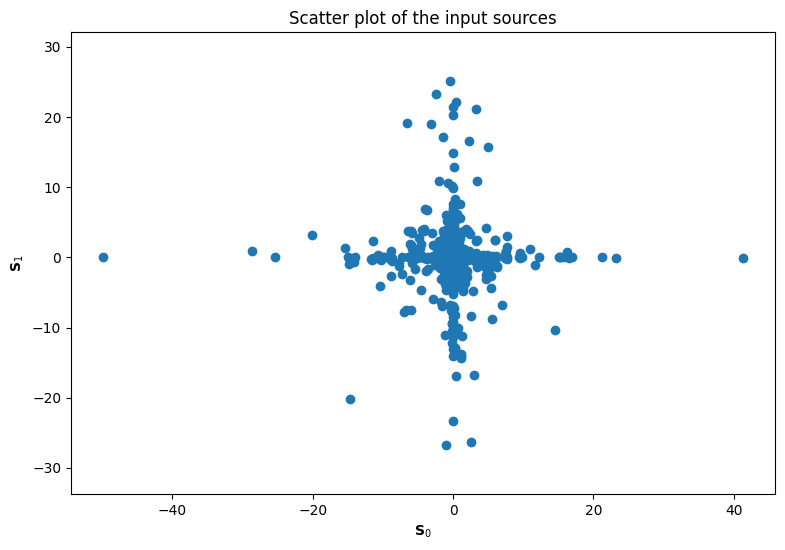

In [3]:
n = 2         # number of sources
t = 1024      # number of samples
noise_level = 80 # noise level, in dB
power = 3 # power exponent used in the source generation



# TO DO : generate a simulated source S matrix.
# S will be of dimensions n x t.
# Each of the n sources (i.e. lines of S) will follow the approximately sparse
# law we used above.

S = np.random.randn(n, t)**power

fig = plt.figure(figsize=(20, 6))
fig.add_subplot(1,2,1)
plt.title('Scatter plot of the input sources')
plt.plot(S[0, :], S[1, :], 'C0o')
plt.xlabel("$\mathbf{S}_0$")
plt.ylabel("$\mathbf{S}_1$")
plt.axis('equal');

The shape is characterized by a high density of points near the origin and a few points extending outward in all directions, creating a sort of "starburst" pattern. This pattern is indicative of the power-law distribution applied to the sources, where the majority of the values are close to zero, resulting in the dense cluster at the center, and a few outliers with larger magnitudes stretching out towards the extremities of the plot.

The geometric interpretation here reflects the approximately sparse nature of the sources: most of the data is compressed into a small range near the origin (indicating values close to zero), but with a presence of higher magnitude values (the outliers) which are the result of the power transformation applied to the normally distributed values. 

In [4]:
# # Here, we generate a mixture matrix (dimensions m x t) from the sources in S
# m = 4         # number of observations

# A = np.random.randn(m, n)
# X = A@S

# noise_level = 120

# # To be more realistic, we add some noise to the mixing.
# # Mixtures with SNR > 120 dB can be considered as noiseless for most applications.
# if noise_level < 120:
#     #--- Add noise
#     N = np.random.randn(m,t)
#     N = 10.**(-noise_level/20.)*np.linalg.norm(X)/np.linalg.norm(N)*N
#     X = X + N

Plot the scatter plot of X. What do onesee ?

What do the directions of the lines oneobserve correspond ?

Try several A matrices, noise_values and powers. Any comment?

<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Daniel Torres\AppData\Local\Temp\ipykernel_13928\3071385426.py:28: SyntaxWarning: invalid escape sequence '\m'
  axs[i].set_xlabel("$\mathbf{X}_0$")
C:\Users\Daniel Torres\AppData\Local\Temp\ipykernel_13928\3071385426.py:29: SyntaxWarning: invalid escape sequence '\m'
  axs[i].set_ylabel("$\mathbf{X}_1$")


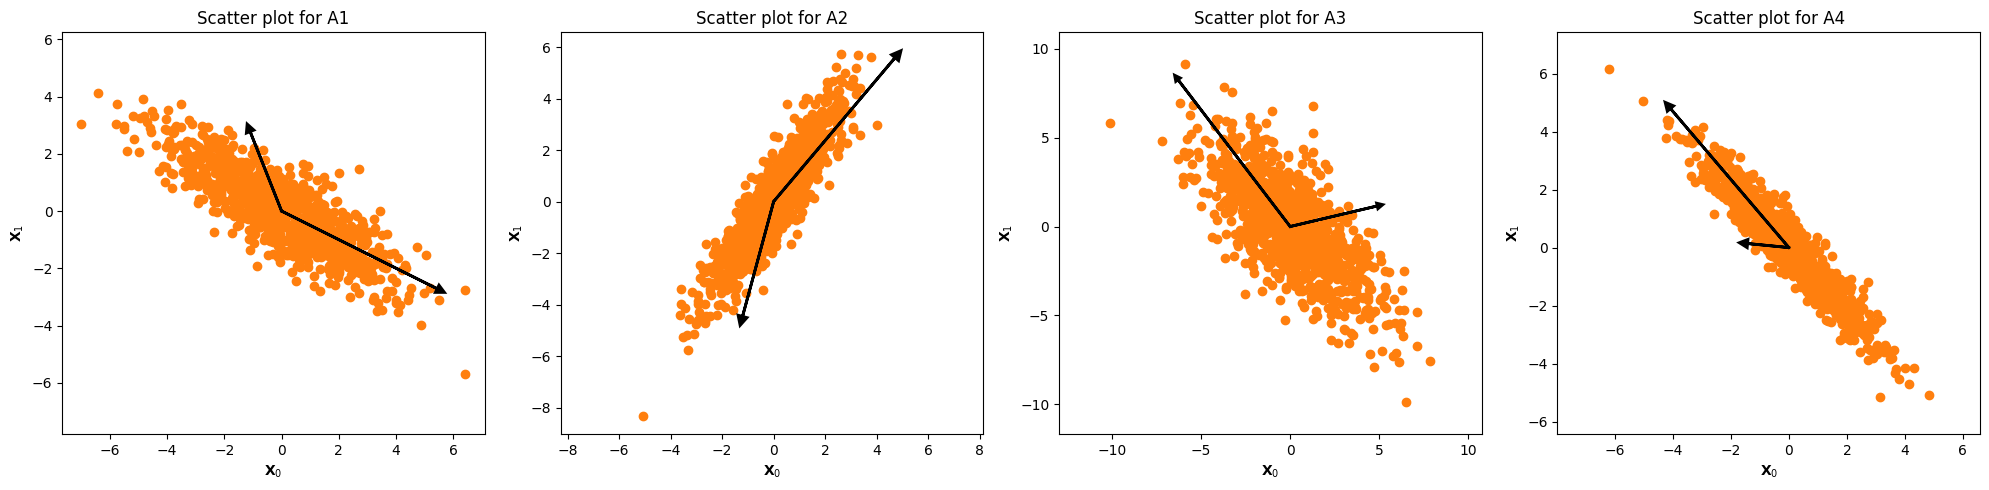

In [49]:
n = 2  # number of sources
t = 1024  # number of samples
S = np.random.randn(n, t)  # Example source matrix

# Generate four different mixing matrices A
A_matrices = [np.random.randn(4, n) for _ in range(4)]
noise_level = 120  # Noise level in dB

def add_noise(X, noise_level):
    if noise_level < 120:
        N = np.random.randn(*X.shape)
        N = 10.**(-noise_level/20.)*np.linalg.norm(X)/np.linalg.norm(N)*N
        return X + N
    return X

# Generate observations X for each A
X_matrices = [add_noise(A @ S, noise_level) for A in A_matrices]

fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1x4 grid of subplots

for i, (A, X) in enumerate(zip(A_matrices, X_matrices)):
    vrange = 0.25 * max(np.sqrt(np.sum(X * X, 0)))
    
    axs[i].arrow(0, 0, vrange * A[0, 0], vrange * A[1, 0], fc="k", ec="k", linewidth=2, head_width=0.1 * vrange, head_length=0.1 * vrange)
    axs[i].arrow(0, 0, vrange * A[0, 1], vrange * A[1, 1], fc="k", ec="k", linewidth=2, head_width=0.1 * vrange, head_length=0.1 * vrange)
    axs[i].plot(X[0, :], X[1, :], 'C1o', zorder=0)
    axs[i].set_title(f'Scatter plot for A{i+1}')
    axs[i].set_xlabel("$\mathbf{X}_0$")
    axs[i].set_ylabel("$\mathbf{X}_1$")
    axs[i].axis('equal')

plt.tight_layout()  # Adjust layout to not overlap subplots
plt.show()


The scatter plot displays the distribution of mixed signals, likely resulting from a blend of two original sources through a matrix `A`. The plot reveals a structured pattern, indicative of a non-random mixing process. These arrows highlight the directions of maximum variance in the dataset.

Experimenting with various mixing matrices, noise levels, and powers would affect the scatter plot's structure. Altering the mixing matrix `A` changes the orientation and spread of the data points, simulating different linear combinations of the sources. The noise level influences the clarity of the underlying structure; lower noise allows for a clearer distinction of the directions of maximum variance. Varying the power that controls sparsity impacts the distribution of source values; higher powers enhance sparsity, potentially making it easier to discern and separate the original sources in the presence of linear mixing. 

**II - Performing non-blind source separation**

**1) Data generation**

Before going into blind source separation, in which we want to find physical **A** and **S** matrices such that **X = AS + N**, let us first consider the simpler setting in which we know **A** and want to recover **S**.
We will consider the noisy mixture of two sine signals. The methodology extends to more complex datasets.

N.B. : unmixing two sinus signal could be done much more easily than using the algorithms we saw during the class. Nevertheless, focusing on such synthetic data enables an easy visualization. The principle readily extend to more complex datasets, such as images.

(-25.0, 25.0)

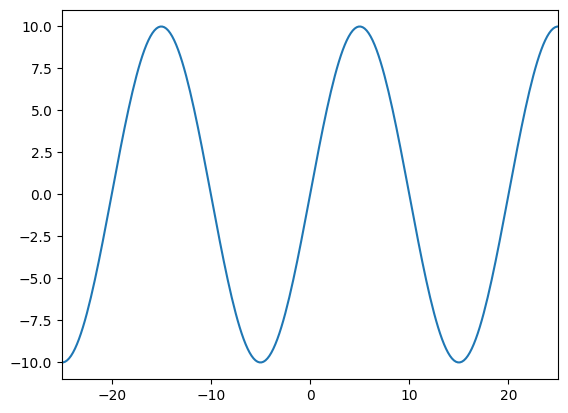

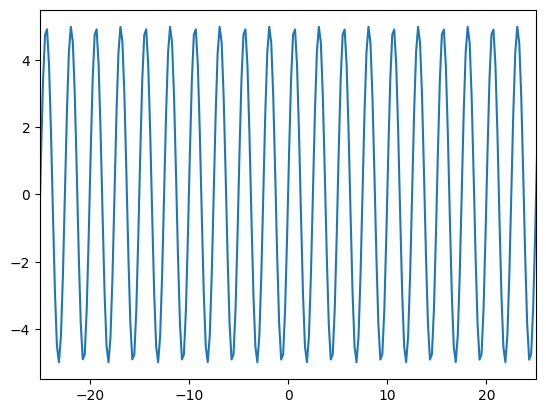

In [6]:
# Source generation
t = 10000
x_abs = np.linspace(-1000, 1000, t)

S = np.zeros((2, t))
S[0,:] = 10*np.sin(2*np.pi*0.05*x_abs)
S[1,:] = 5*np.sin(2*np.pi*0.4*x_abs)

plt.figure(),plt.plot(x_abs, S[0,:])
plt.xlim([-25, 25])
plt.figure(),plt.plot(x_abs, S[1,:])
plt.xlim([-25, 25])

Here, we will transform the sources signals S into the DCT domain.

What is the objective of using the DCT?

Plot the above DCT and justify what onesee. Pay attention to the labeling of the x-axis. Try with sines of various frequencies.

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x1e0fee48590>])

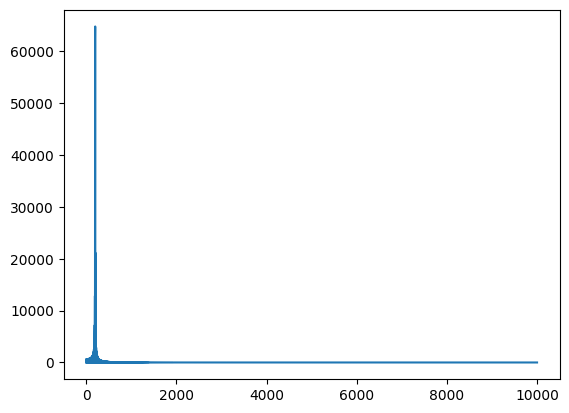

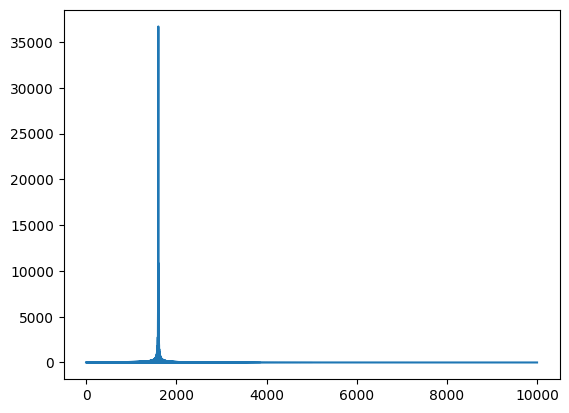

In [7]:
# Transformation into the DCT domain
Sf = sff.dct(S)

# Plot of the DCT coefficients (absolute value)
plt.figure(),plt.plot(abs(Sf[0,:]))
plt.figure(),plt.plot(abs(Sf[1,:]))

The peaks in the DCT spectrum are directly related to the frequencies of the sinusoidal components within the signal. Specifically, for a sine wave, the DCT spectrum will display peaks at indices corresponding to the sine wave's frequency. This occurs because the DCT operates by projecting the signal onto a series of cosine functions of different frequencies. 

When the frequency of the sine wave matches the frequency of one of these cosine functions, the projection (or the coefficient in the DCT domain) will have a large value, resulting in a peak. The location of the peak along the frequency axis (x-axis) in the DCT domain is a reflection of the sine wave's frequency: the lower the frequency of the sine wave, the closer the peak will be to the origin in the DCT spectrum, and conversely, higher frequencies will correspond to peaks further away from the origin.

The importance of the DCT in the context of signal separation lies in its ability to provide a sparse representation of the signals. If the signals of interest—such as the sine waves in this case—are sparse in the DCT domain, which means only a few DCT coefficients are significantly different from zero, then the separation process can be more effective. When the mixed signals are transformed into the DCT domain, the separation algorithm can exploit this sparsity by focusing on the significant coefficients which contain the most information about the original signals. 

Essentially, the transform helps isolate the distinctive features (frequencies) of each source signal, thereby simplifying the unmixing process. In more complex datasets, such as images or audio signals, leveraging sparsity in a transform domain like DCT can lead to more robust separation, especially in the presence of noise or when the signals have overlapping frequencies. The DCT helps to untangle these complexities, facilitating the recovery of the original source signals from their mixtures.

Data generation : now, we will create a mixture X = AS + N.

Plot the mixtures. Explain what onesee.

Compute the DCT of X. Plot it and explain. Which caracteristic of the DCT will we use to recover the sources?

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x1e0fef0dee0>])

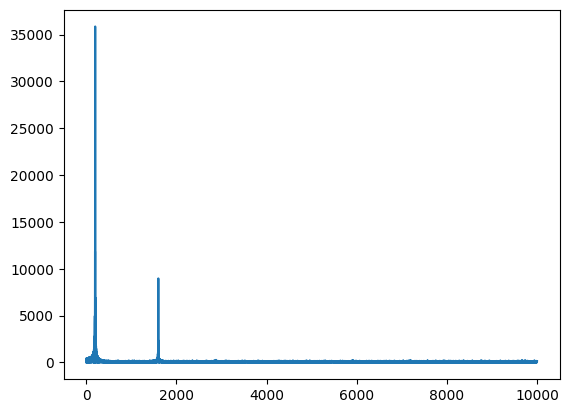

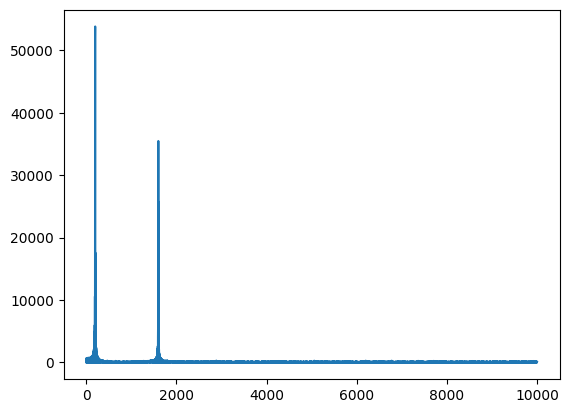

In [8]:
A = np.array([[0.5547002 , 0.24253563],
       [0.83205029, 0.9701425 ]]) # onecan try other A values, but the columns must have a unitary norm.

X = A@S
X = X + 0.5*np.random.randn(np.shape(X)[0],np.shape(X)[1]) # onecan try other noise values

# Plot of the observations in TC domain
Xf = sff.dct(X)
plt.figure(),plt.plot(abs(Xf[0,:]))
plt.figure(),plt.plot(abs(Xf[1,:]))

When oneplot the time-domain representation of the mixtures in $ X $, one will observe that the individual sinusoidal patterns of $ S $ are no longer discernible. Instead, the mixtures will exhibit a superposition of the two sine waves, and depending on the mixing matrix $ A $, the resulting signals could appear more complex and less structured due to the linear combination of the sources and the added noise.

After computing the DCT of $ X $, onewill plot the frequency-domain representation of the mixtures. The DCT plot will reveal the frequency components of the mixed signals. Due to the sinusoidal nature of the sources, oneshould still be able to observe peaks at the frequencies corresponding to those of the original sine waves, but these peaks might now be less pronounced or have changed in their relative magnitudes because of the mixing process.

The characteristic of the DCT that is most useful for source recovery is its tendency to result in a sparse representation of the signal. Even though the mixtures contain noise, the DCT can help isolate the significant frequency components that correspond to the original sources, because the noise tends to spread its energy across the entire frequency spectrum. This results in smaller coefficients that are distributed rather than concentrated. In contrast, the signal's true frequency components, even when mixed, will still stand out as peaks in the DCT spectrum.

The small peaks that appear in the DCT spectrum because of the noise represent the noise's frequency components. Unlike the clear and distinct peaks corresponding to the sine waves' frequencies, the noise-induced peaks are typically smaller and more numerous, reflecting the broad-spectrum nature of noise. These smaller peaks indicate that the noise is not concentrated in any specific frequency but is instead spread across the entire spectrum. When attempting to recover the original sources, onewill leverage the sparsity in the DCT domain, aiming to separate the significant peaks of the original signals from the more uniform presence of the noise-induced peaks. The goal in the source recovery process is to distinguish and retain the relevant frequency components while minimizing the impact of these smaller, noise-related peaks.

**2) Source separation**

Now that we generated observations from simulated sources, we will focus on the source separation problem: recovering the sources from the observations (and the knowledge of A, since we are here in the non-blind setting).

To do that, we propose here to solve the source separation problem using a sparsity constraint on the sources. The cost function will then be minimized using the ISTA algorithm.

First, write the cost function we want to minimize to perform non-blind sparse source separation. Explain each term (in particular, which one is smooth or not). Is this cost function convex?


The cost function $ C(S) $ to minimize can be written as:

$$
C(S) = \frac{1}{2} \| X - AS \|_F^2 + \lambda \| S \|_1
$$

where:
- $ \| X - AS \|_F^2 $ is the data fidelity term (smooth term). It measures the squared Frobenius norm of the difference between the observed mixed signals $ X $ and the estimated mixed signals $ AS $, ensuring the reconstructed signals are as close as possible to the actual observations.
- $ \lambda \| S \|_1 $ is the sparsity-promoting regularization term (non-smooth term). It is the $ \ell_1 $-norm of the source matrix $ S $, scaled by a regularization parameter $ \lambda $. This term enforces the sparsity of the sources by penalizing non-zero values in $ S $.

Each term in the cost function serves a purpose:
- The data fidelity term is smooth because it has a continuous gradient. This term ensures that the separation process results in sources that, when mixed by the known matrix $ A $, will closely reproduce the observed mixed signals.
- The sparsity-promoting term is non-smooth due to the absolute value operation inherent in the $ \ell_1 $-norm. This term is responsible for enforcing sparsity in the source estimates, allowing the algorithm to favor solutions where many elements of $ S $ are zero, thus promoting a sparse representation.

Regarding convexity, the cost function $ C(S) $ is convex. The first term is a quadratic function of $ S $, which is always convex. The second term, the $ \ell_1 $-norm, is also convex. The sum of two convex functions is itself convex, ensuring that the entire cost function $ C(S) $ is convex.

Compute the gradient along the S variable of the data-fidelity term.

Recall what the proximal operator of the l1-norm is.


### Gradient of the Data-Fidelity Term

The data-fidelity term in the cost function is given by $ \frac{1}{2} \| X - AS \|_F^2 $. The gradient of this term with respect to $ S $ can be found by differentiating the term with respect to $ S $:

$$
\nabla_S \left( \frac{1}{2} \| X - AS \|_F^2 \right) = \nabla_S \left( \frac{1}{2} \text{Tr}((X - AS)^\top(X - AS)) \right) = -A^\top(X - AS)
$$

where $ \text{Tr} $ denotes the trace of a matrix and $ A^\top $ denotes the transpose of matrix $ A $. The gradient is essentially the product of the transpose of the mixing matrix $ A $ and the residual (the difference between the observed signals $ X $ and the estimated mixed signals $ AS $).

### Proximal Operator of the $ \ell_1 $-norm

The proximal operator of the $ \ell_1 $-norm, often used for promoting sparsity, is the soft-thresholding operator. For a given threshold $ \lambda $, the proximal operator $ \text{prox}_{\lambda \| \cdot \|_1}(v) $ is defined component-wise for a vector $ v $ as:

$$
\text{prox}_{\lambda \| \cdot \|_1}(v)_i = \begin{cases}
v_i - \lambda & \text{if } v_i > \lambda \\
0 & \text{if } |v_i| \leq \lambda \\
v_i + \lambda & \text{if } v_i < -\lambda
\end{cases}
$$

This operator effectively "shrinks" each component of $ v $ towards zero by the threshold $ \lambda $, setting it to zero if it is within $ \pm \lambda $.

In [9]:
def prox_l1(S_est, thrd):
    # Apply soft-thresholding to each element in S_est
    return np.sign(S_est) * np.maximum(np.abs(S_est) - thrd, 0)

Explain the main idea of the ISTA algorithm. Then, implement it.

The Iterative Shrinkage-Thresholding Algorithm (ISTA) is an optimization method commonly used to solve problems that involve the minimization of a cost function composed of a smooth term and a non-smooth term that promotes sparsity. ISTA is particularly well-suited to problems where the cost function is convex, as is the case with the sparse source separation problem we are considering.

### Main Idea of ISTA:

The main idea behind ISTA is to perform iterative updates to the estimate of the solution by taking steps proportional to the negative gradient of the smooth part of the cost function (to decrease the cost function), followed by the application of a proximal operator that enforces the sparsity constraint (non-smooth part). The steps in ISTA can be outlined as follows:

1. **Gradient Descent Step**: Update the estimate of the solution by taking a step in the direction of the negative gradient of the smooth part of the cost function (data-fidelity term).
2. **Proximal Step**: Apply the proximal operator (soft-thresholding in the case of the $ \ell_1 $-norm) to the updated estimate to enforce sparsity.
3. **Convergence Check**: Repeat these steps until the algorithm converges or a predetermined number of iterations is reached.

In [10]:
def ISTA(X, A, n, lamb=0, nbIt=100):
    # Initialize S_est with zeros of the appropriate dimensions (n x t)
    S_est = np.zeros((n, X.shape[1]))

    # Compute the Lipschitz constant for the gradient
    L = np.max(np.linalg.eigvals(np.dot(A.T, A)).real) # Ensure we take the real part for the eigenvalues

    for it in range(nbIt):
        # Gradient step
        grad = np.dot(A.T, np.dot(A, S_est) - X)
        
        # Update estimate
        S_est = S_est - (1/L) * grad
        
        # Proximal step
        S_est = prox_l1(S_est, lamb/L)

    return S_est

It's now time to play with the code : launch the ISTA algorithm and look at the results.

Try various lamb values. What is the minimum value oneshould no go below? What is the issue with choosing too big values?

In [48]:
# Trying different values of lambda
S_estf1000 = ISTA(Xf, A = A, n=2, lamb=1000, nbIt = 1000)
S_estf100 =  ISTA(Xf, A = A, n=2, lamb=100,  nbIt = 1000)
S_estf10 =   ISTA(Xf, A = A, n=2, lamb=10,   nbIt = 1000)
S_estf1 =    ISTA(Xf, A = A, n=2, lamb=1,    nbIt = 1000)

Plot the estimated sources in the DCT domain. What kind of sparsity to they exhibit? Why?

Text(0.5, 1.0, 'Estimated source 2, lambda=1')

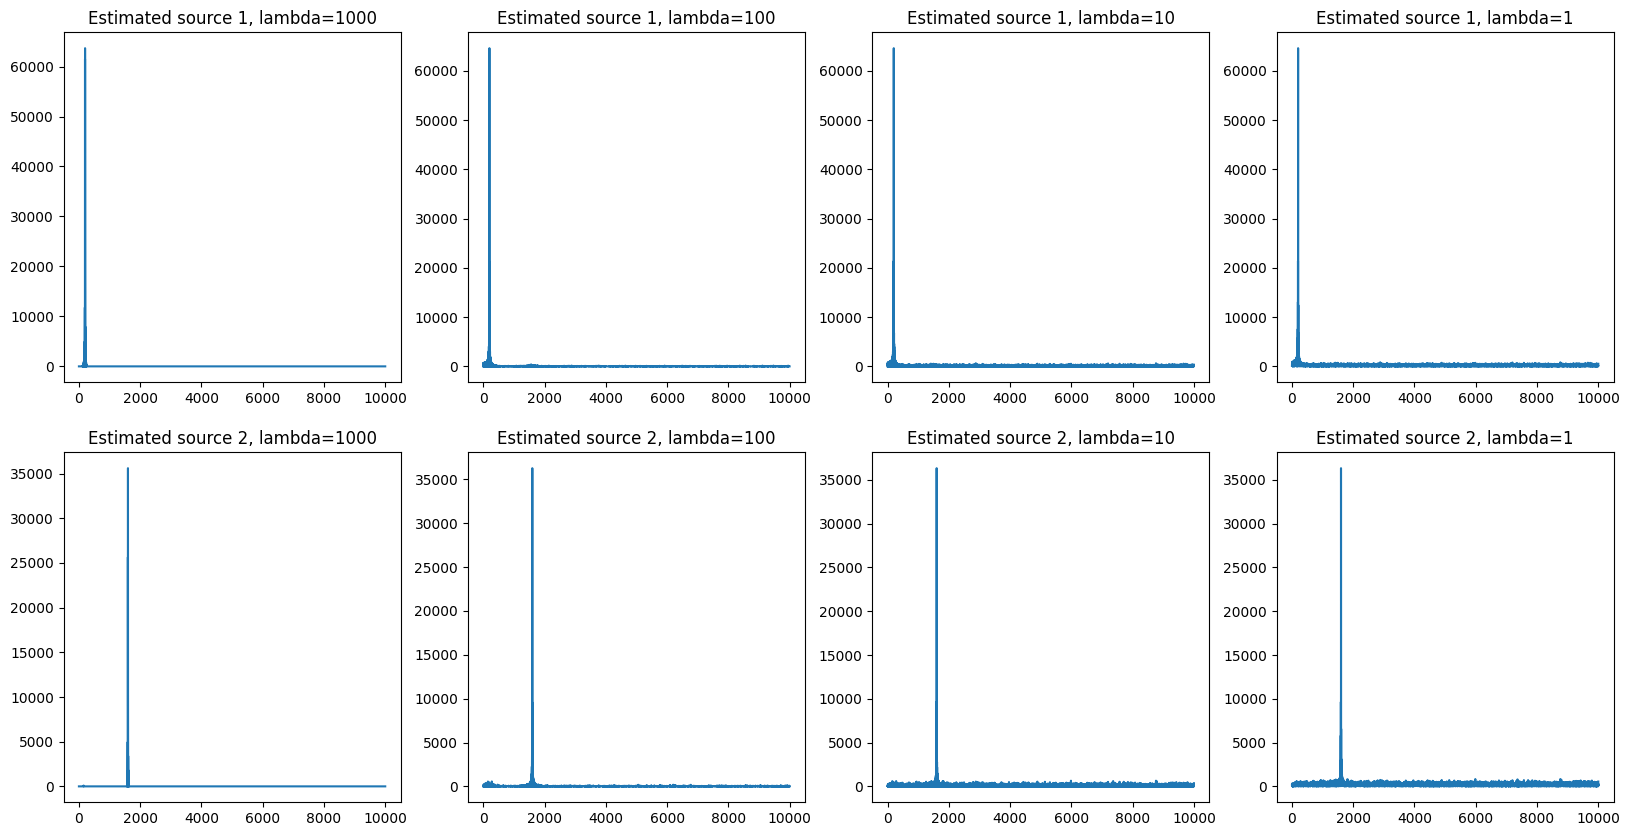

In [46]:
# Plot of the estimated sources in the DCT domain (grid 2x4)
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.plot(abs(S_estf1000[0,:]))
plt.title('Estimated source 1, lambda=1000')

plt.subplot(2, 4, 2)
plt.plot(abs(S_estf100[0,:]))
plt.title('Estimated source 1, lambda=100')

plt.subplot(2, 4, 3)
plt.plot(abs(S_estf10[0,:]))
plt.title('Estimated source 1, lambda=10')

plt.subplot(2, 4, 4)
plt.plot(abs(S_estf1[0,:]))
plt.title('Estimated source 1, lambda=1')

plt.subplot(2, 4, 5)
plt.plot(abs(S_estf1000[1,:]))
plt.title('Estimated source 2, lambda=1000')

plt.subplot(2, 4, 6)
plt.plot(abs(S_estf100[1,:]))
plt.title('Estimated source 2, lambda=100')

plt.subplot(2, 4, 7)
plt.plot(abs(S_estf10[1,:]))
plt.title('Estimated source 2, lambda=10')

plt.subplot(2, 4, 8)
plt.plot(abs(S_estf1[1,:]))
plt.title('Estimated source 2, lambda=1')

### Determining the Range for $ \lambda $

1. **Lower Bound of $ \lambda $** (minimum value as a range definition $ \lambda = 0$ ) :
   - If $ \lambda $ is too low, the regularization effect is minimal, which may lead to a solution that resembles a least squares fit. This can result in an $ S $ that is too dense, potentially overfitting the noise in the data rather than capturing the underlying sparse structure of the source signals. In cases where $ \lambda $ is very small or approaches zero, the sparsity promoting effect is essentially nonexistent, and the solution will prioritize data fidelity exclusively.

2. **Upper Bound of $ \lambda $** (empirical $ \lambda = 10000$ ) : 
   - On the other hand, if $ \lambda $ is set too high, the solution may become overly sparse, effectively zeroing out too many components of $ S $. This can lead to underfitting, where significant features of the source signals are lost or ignored, and the resulting source estimates may not adequately reconstruct the observed data. An excessively high $ \lambda $ forces the algorithm to focus primarily on minimizing the $ \ell_1 $-norm of $ S $, at the cost of data accuracy.

Transform the sources back in the direct domain. Plot them. What do onesee? Explain the differences with the original sources. Conclude.

(-50.0, 50.0)

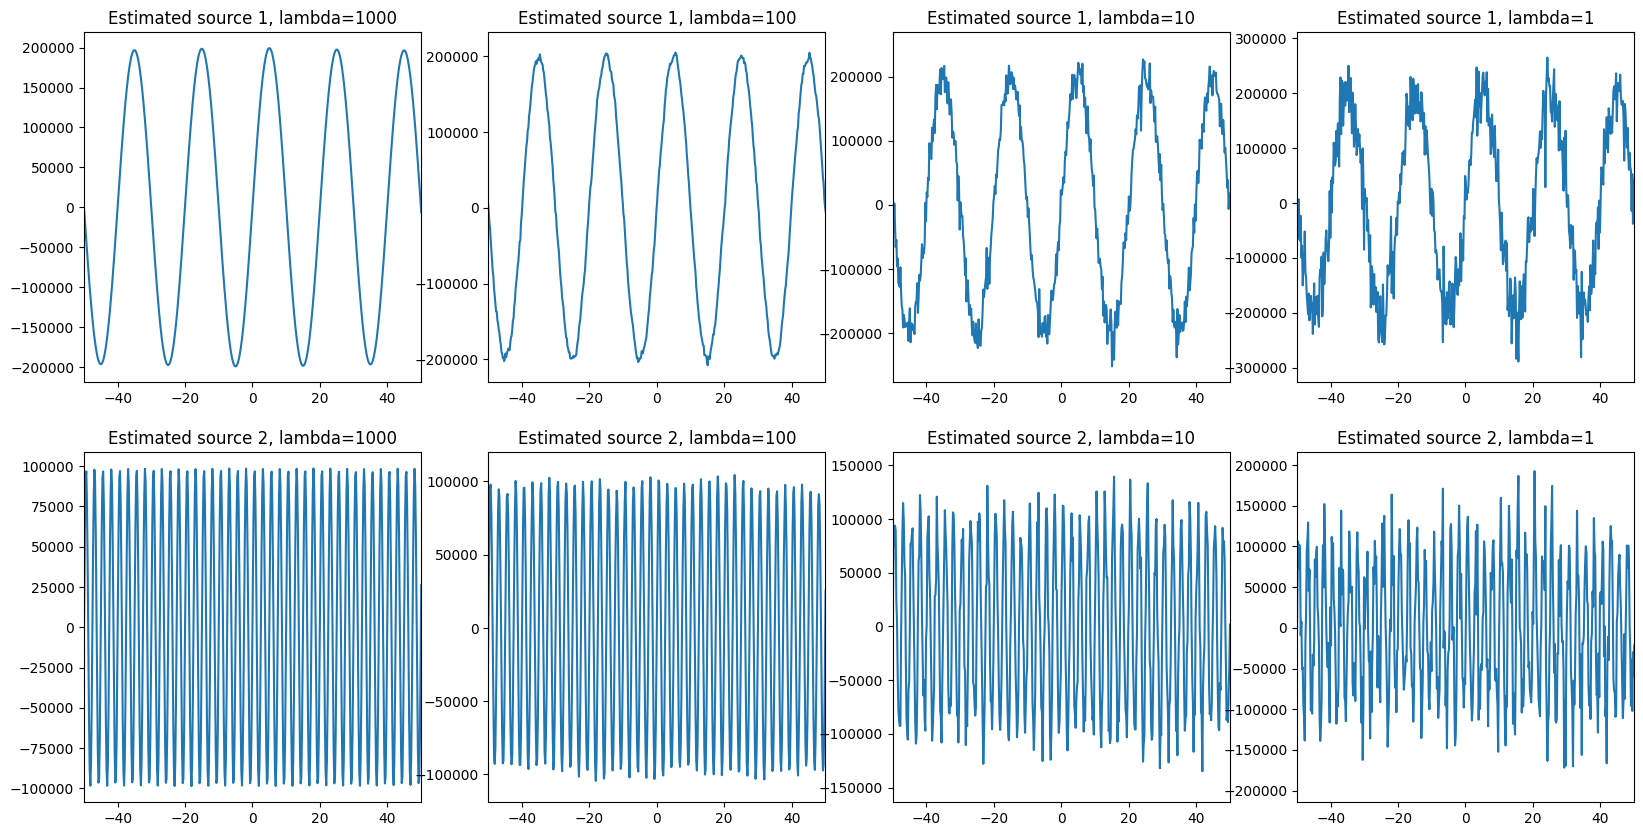

In [47]:
# Inverse transformation
S_est1000 = sff.idct(S_estf1000)
S_est100 = sff.idct(S_estf100)
S_est10 = sff.idct(S_estf10)
S_est1 = sff.idct(S_estf1)

# Plot of the estimated sources in the time domain (grid 2x4)
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.plot(x_abs, S_est1000[0,:])
plt.title('Estimated source 1, lambda=1000')
plt.xlim(-50, 50)

plt.subplot(2, 4, 2)
plt.plot(x_abs, S_est100[0,:])
plt.title('Estimated source 1, lambda=100')
plt.xlim(-50, 50)

plt.subplot(2, 4, 3)
plt.plot(x_abs, S_est10[0,:])
plt.title('Estimated source 1, lambda=10')
plt.xlim(-50, 50)

plt.subplot(2, 4, 4)
plt.plot(x_abs, S_est1[0,:])
plt.title('Estimated source 1, lambda=1')
plt.xlim(-50, 50)

plt.subplot(2, 4, 5)
plt.plot(x_abs, S_est1000[1,:])
plt.title('Estimated source 2, lambda=1000')
plt.xlim(-50, 50)

plt.subplot(2, 4, 6)
plt.plot(x_abs, S_est100[1,:])
plt.title('Estimated source 2, lambda=100')
plt.xlim(-50, 50)

plt.subplot(2, 4, 7)
plt.plot(x_abs, S_est10[1,:])
plt.title('Estimated source 2, lambda=10')
plt.xlim(-50, 50)

plt.subplot(2, 4, 8)
plt.plot(x_abs, S_est1[1,:])
plt.title('Estimated source 2, lambda=1')
plt.xlim(-50, 50)

1. **High Lambda (e.g., 1000)**:
   - **Effect**: The source estimates might be overly sparse, potentially missing significant signal components. One might observe that some  components of the signal are zeroed out, and only a few peaks remain.
   - **Consequence**: Poor fidelity to the original signals but high noise suppression.

2. **Moderate Lambda (e.g., 100 and 10)**:
   - **Effect**: These settings might offer a better balance, retaining more of the signal's structure while still enforcing sparsity to a beneficial degree.
   - **Consequence**: Better reconstruction of the original sources with reasonable noise suppression.

3. **Low Lambda (e.g., 1)**:
   - **Effect**: Minimal sparsity enforcement, leading to estimates that are closer to the least squares solution. Most of the signal structure might be retained, but with less noise suppression.
   - **Consequence**: High fidelity to the original signals but potentially more noise retained.

### Conclusion:
The choice of lambda significantly impacts the balance between fidelity to the original sources and noise suppression through sparsity enforcement. Optimal lambda selection depends on the specific characteristics of the signals and the noise level. In practical applications, the lambda value should be chosen based on the desired sparsity level and the acceptable loss of signal details. This experiment illustrates the trade-off between recovering clean signals and avoiding overfitting to the noise or missing critical signal components. By examining the plots, one can conclude about the effectiveness of the source separation and the appropriateness of the sparsity parameter chosen for the given data set.

**III - Blind Source Separation : PALM**

Let's now delve into the core problem : *blind* source separation, in which **A** is unknown. To leverage sparsity, we will use the PALM algorithm.

Thoughout this whole section, we will re-use the same synthetic data as above (i.e., the one generated in II-1).

Write the cost function we want to minimize to perform *blind* sparse source separation. Explain each term (in particular, which one is smooth or not). Is this cost function convex?

In **blind source separation (BSS)**, both the source matrix $ S $ and the mixing matrix $ A $ are unknown and need to be estimated from the observed mixed signals $ X $. The PALM (Proximal Alternating Linearized Minimization) algorithm is used to solve this problem by alternately updating $ A $ and $ S $, each time using proximal gradient steps.

### Cost Function for Blind Sparse Source Separation

The cost function for blind sparse source separation generally includes a data-fidelity term and sparsity-promoting regularization terms for both $ A $ and $ S $. The formulation might look like this:

$$
C(A, S) = \frac{1}{2} \| X - AS \|_F^2 + \lambda_S \| S \|_1 + \lambda_A \| A \|_1
$$

Here's a breakdown of each term:

1. **Data-Fidelity Term: $ \frac{1}{2} \| X - AS \|_F^2 $**
   - This is a smooth term because it has a continuous gradient with respect to both $ A $ and $ S $.
   - It measures the fit between the observed data $ X $ and the model $ AS $, penalizing differences to ensure that the estimated sources and mixing matrix reproduce the observed mixtures as closely as possible.

2. **Sparsity-Promoting Regularization for $ S $: $ \lambda_S \| S \|_1 $**
   - This is a non-smooth term that encourages the sparsity of the source matrix $ S $.
   - $ \lambda_S $ is a regularization parameter that controls the extent of sparsity enforced on $ S $.
   - The $ \| \cdot \|_1 $ norm is used because it effectively promotes sparsity by penalizing the sum of the absolute values of the entries in $ S $.

3. **Sparsity-Promoting Regularization for $ A $: $ \lambda_A \| A \|_1 $**
   - Similar to the regularization on $ S $, this term is non-smooth and promotes the sparsity of the mixing matrix $ A $.
   - $ \lambda_A $ controls the degree of sparsity enforced on $ A $.

### Convexity of the Cost Function

- The cost function $ C(A, S) $ as formulated is **not convex** in both $ A $ and $ S $ jointly. While each of the individual terms is convex with respect to $ A $ alone or $ S $ alone, their combination, particularly the product $ AS $, results in a non-convex problem. The bilinear term $ AS $ introduces interactions between $ A $ and $ S $ that do not preserve convexity when both are considered simultaneously.
- The non-convexity makes the problem more challenging, as there can be multiple local minima, and finding the global minimum is not guaranteed without further assumptions or enhanced optimization strategies.

Recall what the gradient of the data fidelity term over A is.

Compte the proximal operator of the oblique constraint. Implement it.

In [14]:
def prox_oblique(A):
    # Normalize each column to have unit norm
    return A / np.linalg.norm(A, axis=0, keepdims=True)

Implement the PALM algorithm to minimize the cost function onewrote in III-1).

In [15]:
def PALM(X, n=2, lamb=0, nbIt=100):
    m, t = X.shape  # m is the number of sensors, t is the number of samples
    A_est = np.random.rand(m, n)  # Initial guess for A
    S_est = np.random.rand(n, t)  # Initial guess for S

    # Parameters for convergence
    L_A = np.linalg.norm(S_est.dot(S_est.T), 2)  # Lipschitz constant for A
    L_S = np.linalg.norm(A_est.T.dot(A_est), 2)  # Lipschitz constant for S

    for _ in range(nbIt):
        # Update A
        grad_A = -X.dot(S_est.T) + A_est.dot(S_est.dot(S_est.T))
        A_est -= grad_A / L_A
        A_est = prox_oblique(A_est)

        # Update S
        grad_S = -A_est.T.dot(X) + A_est.T.dot(A_est).dot(S_est)
        S_est -= grad_S / L_S
        S_est = prox_l1(S_est, lamb / L_S)

    return A_est, S_est

Launch the PALM algorithm to retrieve both A and S from X. Plot your results. How good is the separation? The separation quality is usually well evaluated comparing the true and estimated A matrices.

In [16]:
# Implementing PALM with different values of lambda
A_est20, palm_S_est20 = PALM(X, lamb=10,  nbIt=1000)
A_est10, palm_S_est10 = PALM(X, lamb=5,   nbIt=1000)
A_est5, palm_S_est5   = PALM(X, lamb=1,   nbIt=1000)
A_est1, palm_S_est1   = PALM(X, lamb=0.1, nbIt=1000)

(-50.0, 50.0)

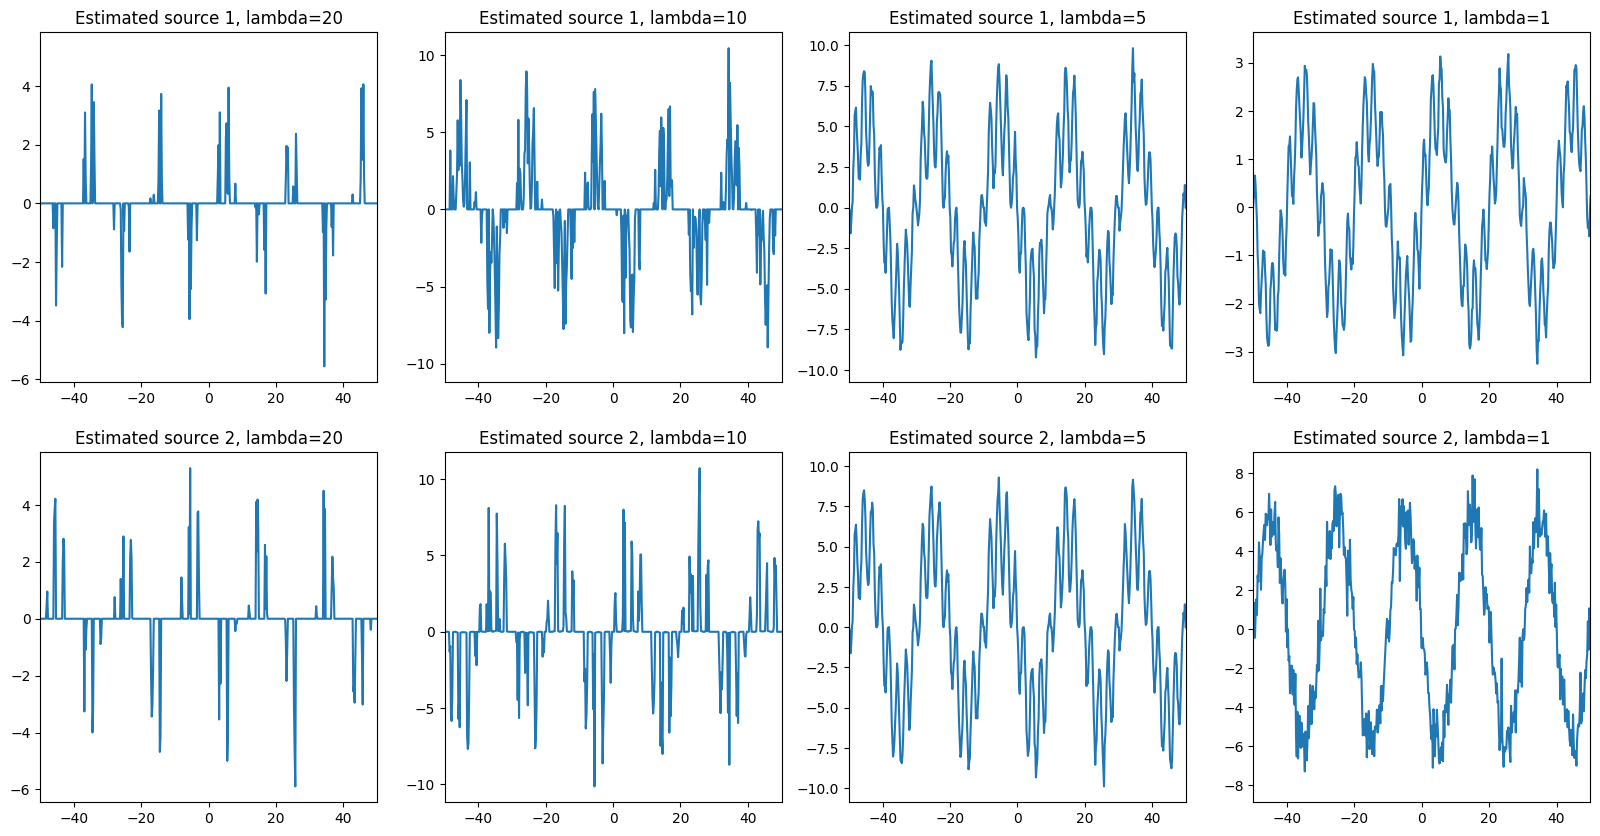

In [18]:
# Plot of the estimated sources in the time domain (grid 2x4)
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.plot(x_abs, palm_S_est20[0,:])
plt.title('Estimated source 1, lambda=20')
plt.xlim(-50, 50)

plt.subplot(2, 4, 2)
plt.plot(x_abs, palm_S_est10[0,:])
plt.title('Estimated source 1, lambda=10')
plt.xlim(-50, 50)

plt.subplot(2, 4, 3)
plt.plot(x_abs, palm_S_est5[0,:])
plt.title('Estimated source 1, lambda=5')
plt.xlim(-50, 50)

plt.subplot(2, 4, 4)
plt.plot(x_abs, palm_S_est1[0,:])
plt.title('Estimated source 1, lambda=1')
plt.xlim(-50, 50)

plt.subplot(2, 4, 5)
plt.plot(x_abs, palm_S_est20[1,:])
plt.title('Estimated source 2, lambda=20')
plt.xlim(-50, 50)

plt.subplot(2, 4, 6)
plt.plot(x_abs, palm_S_est10[1,:])
plt.title('Estimated source 2, lambda=10')
plt.xlim(-50, 50)

plt.subplot(2, 4, 7)
plt.plot(x_abs, palm_S_est5[1,:])
plt.title('Estimated source 2, lambda=5')
plt.xlim(-50, 50)

plt.subplot(2, 4, 8)
plt.plot(x_abs, palm_S_est1[1,:])
plt.title('Estimated source 2, lambda=1')
plt.xlim(-50, 50)

### Determining the Range for $ \lambda $

1. **Lower Bound of $ \lambda $**:
   - If $ \lambda $ is too low, the regularization effect is minimal, which may lead to a solution that resembles a least squares fit. This can result in an $ S $ that is too dense, potentially overfitting the noise in the data rather than capturing the underlying sparse structure of the source signals. In cases where $ \lambda $ is very small or approaches zero, the sparsity promoting effect is essentially nonexistent, and the solution will prioritize data fidelity exclusively.

2. **Upper Bound of $ \lambda $**:
   - On the other hand, if $ \lambda $ is set too high, the solution may become overly sparse, effectively zeroing out too many components of $ S $. This can lead to underfitting, where significant features of the source signals are lost or ignored, and the resulting source estimates may not adequately reconstruct the observed data. An excessively high $ \lambda $ forces the algorithm to focus primarily on minimizing the $ \ell_1 $-norm of $ S $, at the cost of data accuracy.

### Contrast Between PALM and ISTA:

- **Algorithmic Focus**: ISTA is typically used for non-blind source separation where the mixing matrix $ A $ is known and fixed. It optimally balances the fidelity to the data against the sparsity of the solution through iterative updates solely on $ S $. In contrast, PALM is used in blind source separation scenarios where both $ A $ and $ S $ are unknown. PALM alternates between updating $ A $ and $ S $, adjusting each based on the current estimate of the other.

- **Handling of $ A $ and $ S $**: ISTA directly minimizes a cost function with respect to $ S $ while keeping $ A $ fixed, which simplifies the optimization landscape but restricts its application to cases with known $ A $. PALM, however, treats both $ A $ and $ S $ as variables, which introduces a more complex, non-convex optimization problem but allows it to tackle a wider range of problems where less information is available.

- **Complexity and Application**: ISTA is straightforward and potentially faster when $ A $ is known due to the simpler problem structure. PALM, being more flexible and capable of handling unknown $ A $, is inherently more complex and computationally intensive. It requires careful tuning of parameters, including regularization terms for both $ A $ and $ S $, and can be more sensitive to initialization and step-size choices.

- **Sparsity Promotion**: Both algorithms use $ \ell_1 $ regularization to promote sparsity, but the impact of this regularization is more nuanced in PALM due to the simultaneous updating of $ A $. In PALM, sparsity must be balanced for both matrices, which can be challenging but offers a powerful tool for extracting meaningful sources from highly mixed data.